In [5]:
import pandas as pd
import plotly.express as px
import plotly

### Map of number of physicians per 1000 people

In [3]:
df = pd.read_csv("../data/merged_dataset.csv", index_col=0)
df.head()

,zipcode,population,sqkm,lat,lon,population_density,physicians_count,physicians_density,physicians_per_1000_people
0,80331,4741,0.782770,48.13575,11.57351,6056.696092,174,222.287517,36.701118
1,80333,11265,1.615148,48.14495,11.56824,6974.593040,102,63.152107,9.054594
2,80335,9042,1.697719,48.14657,11.55112,5325.969728,71,41.820820,7.852245
3,80336,8103,1.568529,48.13101,11.55228,5165.986730,108,68.854321,13.328397
4,80337,15280,1.046991,48.12675,11.55904,14594.203771,51,48.711020,3.337696


In [23]:
max = df["physicians_per_1000_people"].max()
max

36.70111790761442

In [24]:
df["reverse_physicians_per_1000_people"] = df["physicians_per_1000_people"].apply(lambda x: max - x)
df.head()

,zipcode,population,sqkm,lat,lon,population_density,physicians_count,physicians_density,physicians_per_1000_people,reverse_physicians_per_1000_people
0,80331,4741,0.782770,48.13575,11.57351,6056.696092,174,222.287517,36.701118,0.000000
1,80333,11265,1.615148,48.14495,11.56824,6974.593040,102,63.152107,9.054594,27.646524
2,80335,9042,1.697719,48.14657,11.55112,5325.969728,71,41.820820,7.852245,28.848873
3,80336,8103,1.568529,48.13101,11.55228,5165.986730,108,68.854321,13.328397,23.372721
4,80337,15280,1.046991,48.12675,11.55904,14594.203771,51,48.711020,3.337696,33.363422


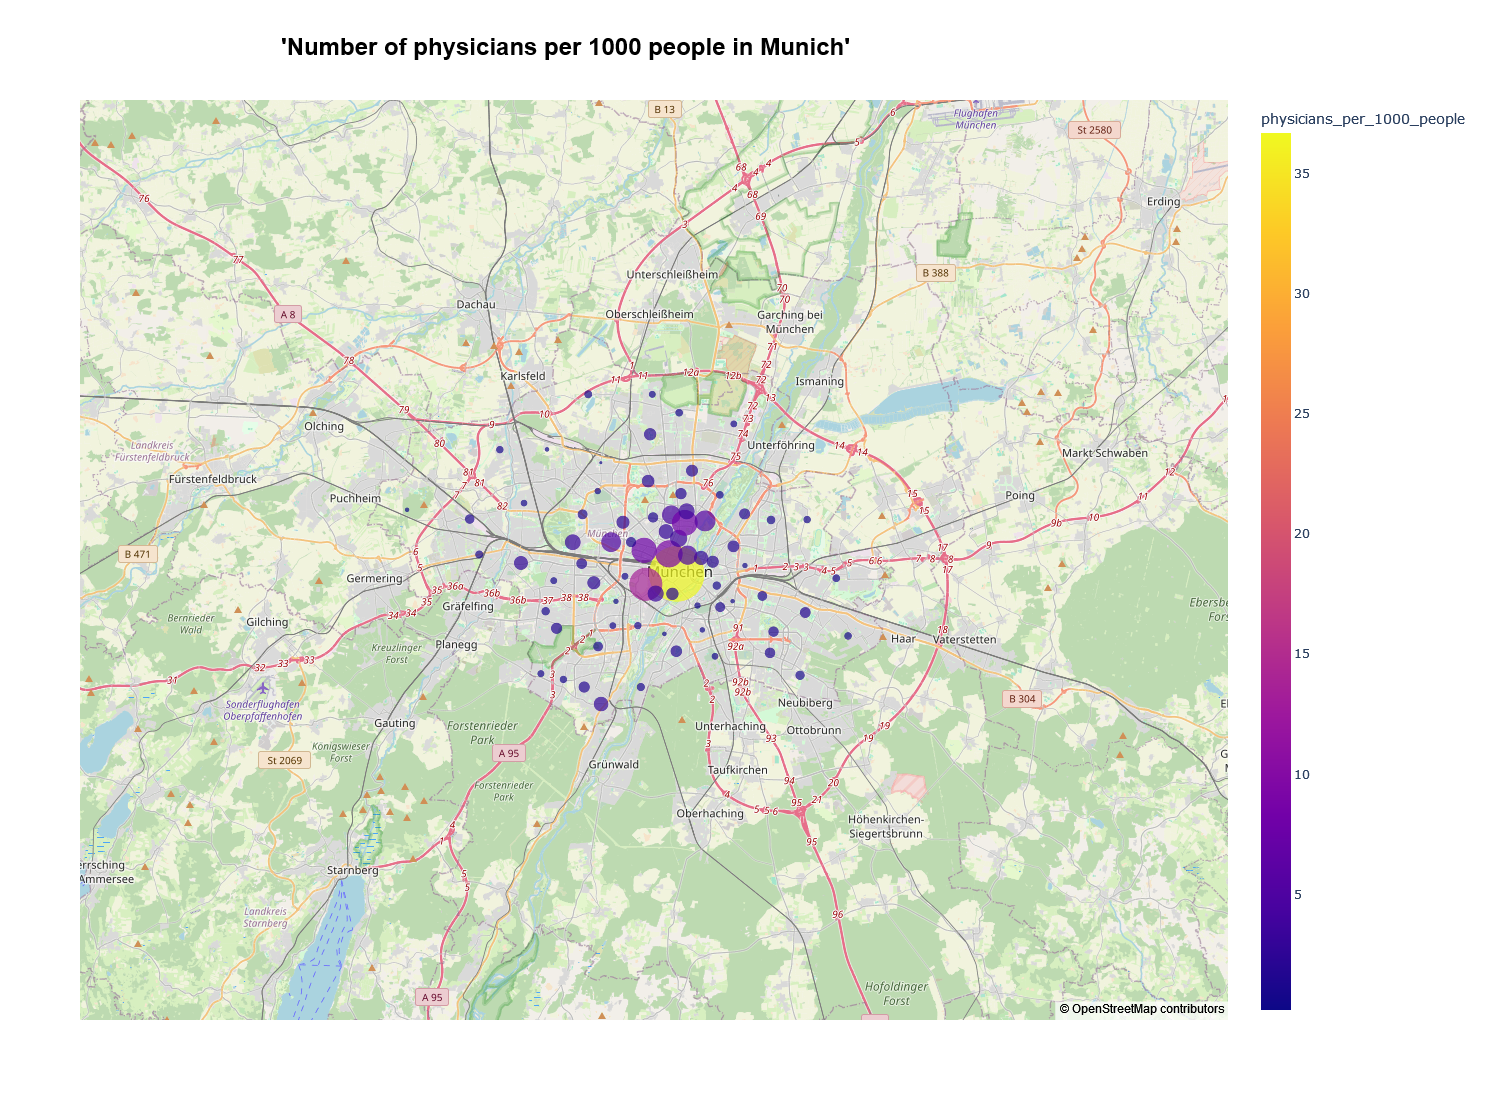

In [26]:
fig = px.scatter_mapbox(df,
                        lat='lat',
                        lon='lon',
                        color='physicians_per_1000_people',
                        size='physicians_per_1000_people', # TODO debug reverse and replace
                        size_max=40,
                        hover_name='zipcode',
                        hover_data=['zipcode', 'population', 'physicians_count', 'physicians_per_1000_people'],
                        zoom=10,
                        title="<b>'Number of physicians per 1000 people in Munich'</b>",
                        color_discrete_sequence=px.colors.qualitative.Plotly
                       )

fig.update_layout(
                    title={"font_size":20,
                           "xanchor":"center", "x":0.38,
                           "yanchor":"bottom", "y":0.95},
                    title_font=dict(size=24, color='Black', family='Arial, sans-serif'),
                    height=1100,
                    width=1300,
                    autosize=True,
                    hovermode='closest',
                    mapbox=dict(
                        style='open-street-map'
                    ),
                    legend_title_text='Physicians per 1000 people'
)

fig.show()